In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [11]:
amazon = pd.read_csv('./Data/pricedata.csv')

In [11]:
amazon


,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.00,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.00,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,6968,myBaby SoundSpa Portable,2016-08-30,11,11,10,34.14,34.14,AMAZIN',Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6969,6969,myBaby SoundSpa Portable,2016-08-30,12,12,11,34.98,34.98,Happy Titan,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6970,6970,myBaby SoundSpa Portable,2016-08-30,13,13,12,35.00,35.00,DDN INC,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6971,6971,myBaby SoundSpa Portable,2016-08-30,8,8,13,31.95,38.73,Marilyn's Galleria,FBA,19.99,Amazon,Ships from and sold by Amazon.com.,26.77


In [19]:
amazon1 = amazon.drop(columns = "Index")

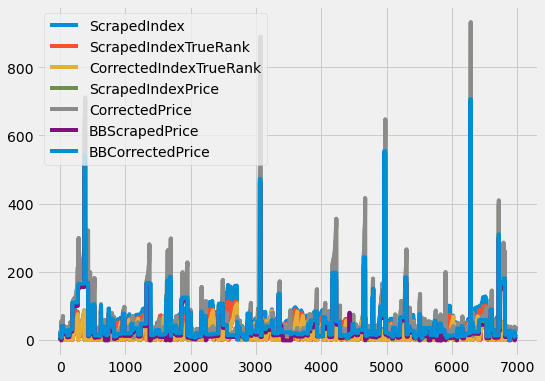

In [20]:
amazon1.plot()

In [12]:
type(amazon)

pandas.core.frame.DataFrame

In [13]:
amazon.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [14]:
amazon.shape

(6973, 14)

In [16]:
amazon.dtypes

Index                       int64
ProductName                object
ScrapeDate                 object
ScrapedIndex                int64
ScrapedIndexTrueRank        int64
CorrectedIndexTrueRank      int64
ScrapedIndexPrice         float64
CorrectedPrice            float64
ScrapedIndexVendor         object
ScrapedIndexVendorType     object
BBScrapedPrice            float64
BBVendorType               object
BBVendor                   object
BBCorrectedPrice          float64
dtype: object

In [21]:
amazon.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
ScrapedIndex                0
ScrapedIndexTrueRank        0
CorrectedIndexTrueRank      0
ScrapedIndexPrice           0
CorrectedPrice              0
ScrapedIndexVendor          0
ScrapedIndexVendorType      0
BBScrapedPrice              0
BBVendorType                0
BBVendor                  164
BBCorrectedPrice            0
dtype: int64

In [32]:
amazon.ProductName.value_counts()

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                                                                              154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                                                                              115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                                                                         106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                                                                                     95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                                                                                      90
                                                                                                                                       

In [33]:
duplicated_products = amazon[amazon.ProductName.duplicated()].ProductName

In [44]:
amazon.describe(include='all')

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
count,6973.000000,6973,6973,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973,6973,6973.000000,6973,6809,6973.000000
unique,NaN,250,26,NaN,NaN,NaN,NaN,NaN,2892,3,NaN,3,62,NaN
top,NaN,Fujifilm INSTAX Mini Instant Film (Rainbow),2016-06-21,NaN,NaN,NaN,NaN,NaN,Amazon.com,Other,NaN,Amazon,Ships from and sold by Amazon.com.,NaN
freq,NaN,154,773,NaN,NaN,NaN,NaN,NaN,192,6372,NaN,5788,5293,NaN
mean,3486.000000,NaN,NaN,25.041876,22.730962,21.559300,54.904896,55.567631,NaN,NaN,36.295817,NaN,NaN,45.827961
std,2013.076046,NaN,NaN,23.618871,20.520442,19.154709,74.293356,74.476092,NaN,NaN,61.838063,NaN,NaN,63.889925
min,0.000000,NaN,NaN,1.000000,1.000000,1.000000,2.380000,2.380000,NaN,NaN,-1.000000,NaN,NaN,0.000000
25%,1743.000000,NaN,NaN,8.000000,7.000000,7.000000,19.530000,20.010000,NaN,NaN,8.990000,NaN,NaN,15.790000
50%,3486.000000,NaN,NaN,17.000000,16.000000,16.000000,31.900000,32.080000,NaN,NaN,14.940000,NaN,NaN,23.340000
75%,5229.000000,NaN,NaN,35.000000,33.000000,31.000000,55.890000,56.100000,NaN,NaN,36.990000,NaN,NaN,47.920000


In [45]:
amazon['ProductName'].nunique()

250

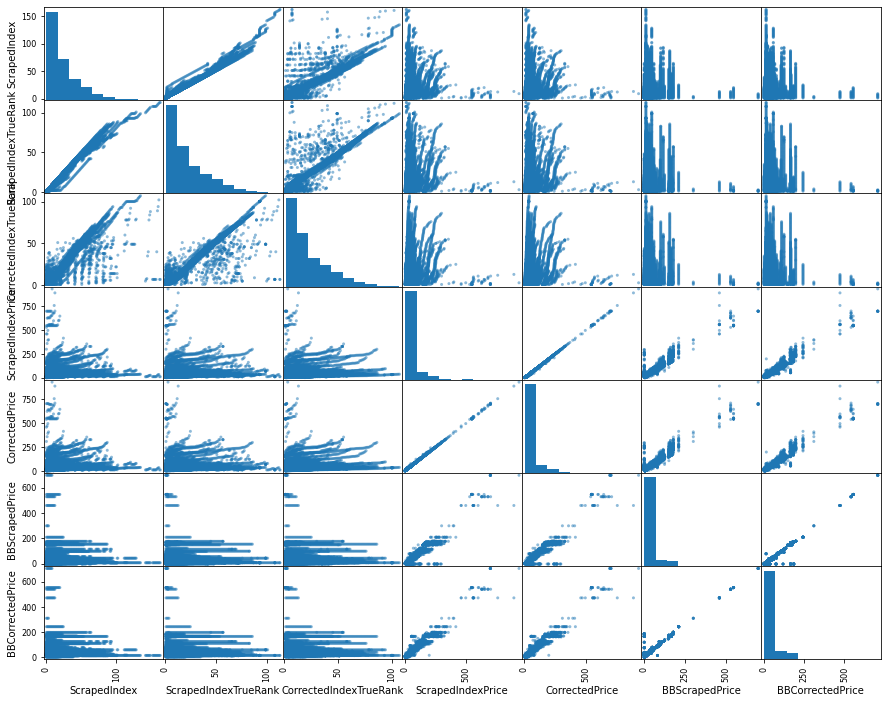

In [7]:
pd.plotting.scatter_matrix(amazon[['ScrapedIndex', 'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice', 'CorrectedPrice', 'ScrapedIndexVendor', 'BBScrapedPrice',  'BBCorrectedPrice']], figsize=(15, 12));

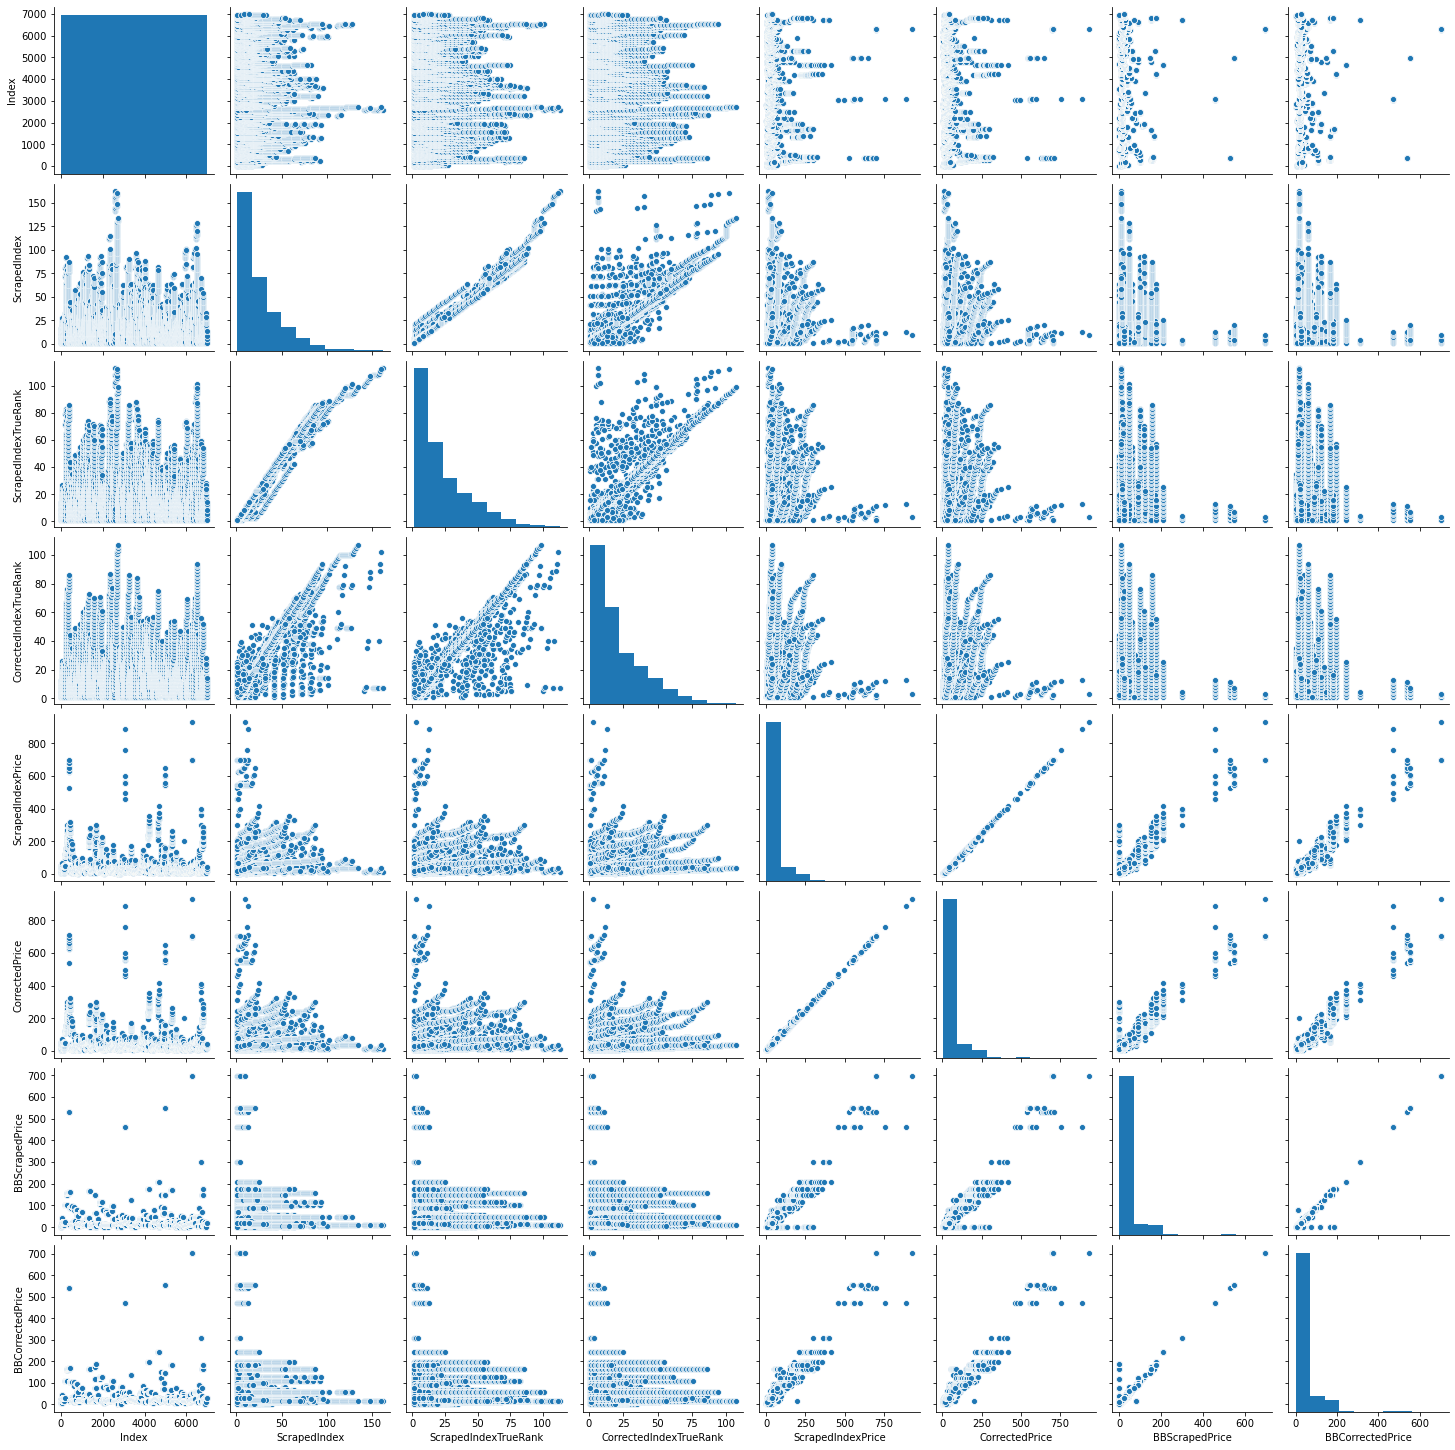

In [9]:
sns.pairplot(amazon);

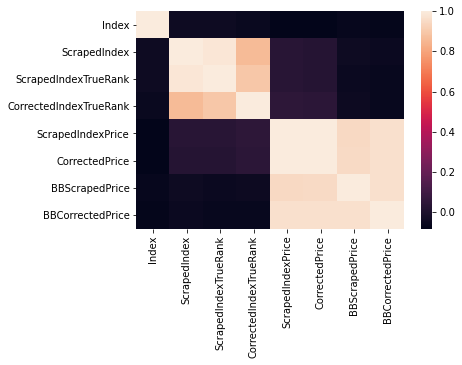

In [13]:
amazon_corr= amazon.corr();
sns.heatmap(amazon_corr);

In [46]:
print ("Rows     : " ,amazon.shape[0])
print ("Columns  : " ,amazon.shape[1])
print ("\nFeatures : \n" ,amazon.columns.tolist())
print ("\nMissing values :  ", amazon.isnull().sum().values.sum())
print ("\nUnique values :  \n",amazon.nunique())

print("\nFirst 5 Rows :  \n",amazon.head())

print("\nLast 5 Rows :  \n",amazon.tail())

Rows     :  6973
Columns  :  14

Features : 
 ['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex', 'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice', 'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType', 'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice']

Missing values :   164

Unique values :  
 Index                     6973
ProductName                250
ScrapeDate                  26
ScrapedIndex               154
ScrapedIndexTrueRank       113
CorrectedIndexTrueRank     107
ScrapedIndexPrice         3885
CorrectedPrice            4028
ScrapedIndexVendor        2892
ScrapedIndexVendorType       3
BBScrapedPrice             198
BBVendorType                 3
BBVendor                    62
BBCorrectedPrice           231
dtype: int64

First 5 Rows :  
    Index                                        ProductName  ScrapeDate  \
0      0  #1 BEST Probiotic Supplement - 60 Day Supply w...  2016-06-14   
1      1  #1 BEST Probiotic Suppleme

In [ ]:
amazon.plot.scatter(x = )

In [47]:
amazon.CorrectedIndexTrueRank

0        1
1        2
2        1
3        1
4        1
        ..
6968    10
6969    11
6970    12
6971    13
6972    14
Name: CorrectedIndexTrueRank, Length: 6973, dtype: int64

In [67]:
products = amazon.groupby(by = "ProductName")

Index                    \
                                                   count    mean       std   
ProductName                                                                  
#1 BEST Probiotic Supplement - 60 Day Supply wi...   2.0     0.5  0.707107   
10 Panel Dip Drug Testing Kit, Test for 10 Diff...  17.0    10.0  5.049752   
2wayz FULL METAL BODY Garden Hose Splitter | Y ...   2.0    19.5  0.707107   
3 Pair Motorcycle Riding Glasses Smoke Clear Ye...   9.0    25.0  2.738613   
3/4 gal Talstar Pro / One Multi Use Pest Contro...  15.0    37.0  4.472136   
...                                                  ...     ...       ...   
Wunderbrow Eyebrow Make Up, Brunette                 6.0  6893.5  1.870829   
XL Watercolor Pad, 9"X12" Fold Over                 28.0  6910.5  8.225975   
Zymox Otic Pet Ear Treatment with Hydrocortisone    32.0  6940.5  9.380832   
iPhone 6S Screen Protector, Maxboost Tempered G...   2.0  6957.5  0.707107   
myBaby SoundSpa Portable                            14.0  6965.5  4.183300   

                                                                             \
                                                       min      25%     50%   
ProductName                                                                   
#1 BEST Probiotic Supplement - 60 Day Supply wi...     0.0     0.25     0.5   
10 Panel Dip Drug Testing Kit, Test for 10 Diff...     2.0     6.00    10.0   
2wayz FULL METAL BODY Garden Hose Splitter | Y ...    19.0    19.25    19.5   
3 Pair Motorcycle Riding Glasses Smoke Clear Ye...    21.0    23.00    25.0   
3/4 gal Talstar Pro / One Multi Use Pest Contro...    30.0    33.50    37.0   
...                                                    ...      ...     ...   
Wunderbrow Eyebrow Make Up, Brunette                6891.0  6892.25  6893.5   
XL Watercolor Pad, 9"X12" Fold Over                 6897.0  6903.75  6910.5   
Zymox Otic Pet Ear Treatment with Hydrocortisone    6925.0  6932.75  6940.5   
iPhone 6S Screen Protector, Maxboost Tempered G...  6957.0  6957.25  6957.5   
myBaby SoundSpa Portable                            6959.0  6962.25  6965.5   

                                                                     \
                                                        75%     max   
ProductName                                                           
#1 BEST Probiotic Supplement - 60 Day Supply wi...     0.75     1.0   
10 Panel Dip Drug Testing Kit, Test for 10 Diff...    14.00    18.0   
2wayz FULL METAL BODY Garden Hose Splitter | Y ...    19.75    20.0   
3 Pair Motorcycle Riding Glasses Smoke Clear Ye...    27.00    29.0   
3/4 gal Talstar Pro / One Multi Use Pest Contro...    40.50    44.0   
...                                                     ...     ...   
Wunderbrow Eyebrow Make Up, Brunette                6894.75  6896.0   
XL Watercolor Pad, 9"X12" Fold Over                 6917.25  6924.0   
Zymox Otic Pet Ear Treatment with Hydrocortisone    6948.25  6956.0   
iPhone 6S Screen Protector, Maxboost Tempered G...  6957.75  6958.0   
myBaby SoundSpa Portable                            6968.75  6972.0   

                                                   ScrapedIndex            \
                                                          count      mean   
ProductName                                                                 
#1 BEST Probiotic Supplement - 60 Day Supply wi...          2.0   1.50000   
10 Panel Dip Drug Testing Kit, Test for 10 Diff...         17.0   9.00000   
2wayz FULL METAL BODY Garden Hose Splitter | Y ...          2.0   1.50000   
3 Pair Motorcycle Riding Glasses Smoke Clear Ye...          9.0   5.00000   
3/4 gal Talstar Pro / One Multi Use Pest Contro...         15.0   8.00000   
...                                                         ...       ...   
Wunderbrow Eyebrow Make Up, Brunette                        6.0   3.50000   
XL Watercolor Pad, 9"X12" Fold Over                        28.0  14.50000   
Zymox Oti

count                                            6723
unique                                            248
top       Fujifilm INSTAX Mini Instant Film (Rainbow)
freq                                              153
Name: ProductName, dtype: object